# ***Imports***

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.metrics import accuracy_score , r2_score , mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score
warnings.filterwarnings('ignore')
nltk.download("punkt_tab")
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# ***Recommendation of Amazon Products***

In [2]:
df=pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
def check_missing_values(dataframe):
    return dataframe.isnull().sum()

print(check_missing_values(df))

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [4]:
df[df.rating_count.isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [5]:
df.dropna(subset=['rating_count'], inplace=True)
print(check_missing_values(df))

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [6]:
def check_duplicates(dataframe):
    return dataframe.duplicated().sum()

print(check_duplicates(df))

0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dtypes: object(1

In [8]:
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%','').astype(float)/100

In [9]:
count = df['rating'].str.contains('\|').sum()
print(f"Total de linhas com '|' na coluna 'rating': {count}")
df = df[df['rating'].apply(lambda x: '|' not in str(x))]
count = df['rating'].str.contains('\|').sum()
print(f"Total de linhas com '|' na coluna 'rating': {count}")

Total de linhas com '|' na coluna 'rating': 1
Total de linhas com '|' na coluna 'rating': 0


In [10]:
df['rating'] = df['rating'].astype(str).str.replace(',', '').astype(float)
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

In [12]:
df['rating_weighted'] = df['rating'] * df['rating_count']

In [13]:
df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]
df['main_category'] = df['category'].astype(str).str.split('|').str[0]

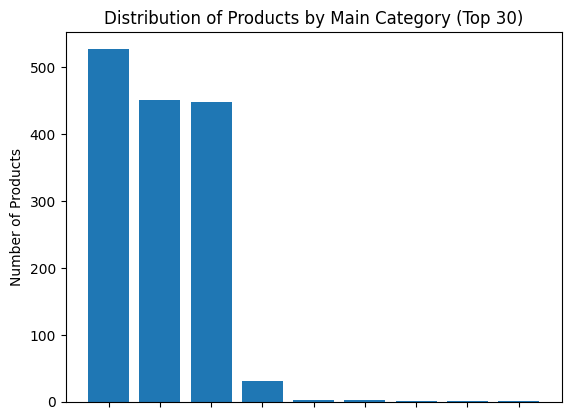

Top 30 main categories:
        Main Category  Number of Products
          Electronics                 526
Computers&Accessories                 451
         Home&Kitchen                 447
       OfficeProducts                  31
   MusicalInstruments                   2
      HomeImprovement                   2
           Toys&Games                   1
        Car&Motorbike                   1
  Health&PersonalCare                   1


In [14]:
main_category_counts = df['main_category'].value_counts()[:30]
plt.bar(range(len(main_category_counts)), main_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Main Category (Top 30)')
plt.xticks(range(len(main_category_counts)), '')
plt.show()

top_main_categories = pd.DataFrame({'Main Category': main_category_counts.index, 'Number of Products': main_category_counts.values})
print('Top 30 main categories:')
print(top_main_categories.to_string(index=False))

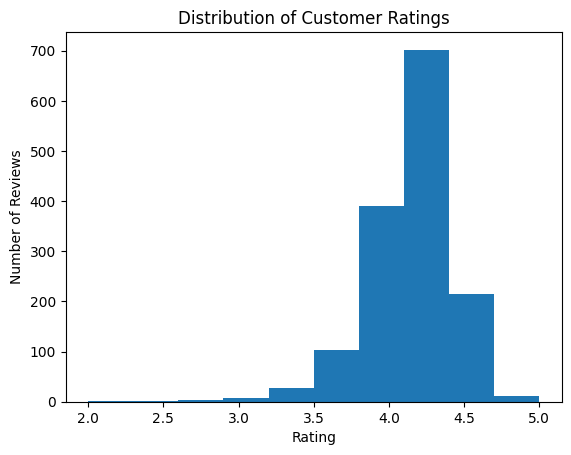

In [15]:
plt.hist(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Customer Ratings')
plt.show()

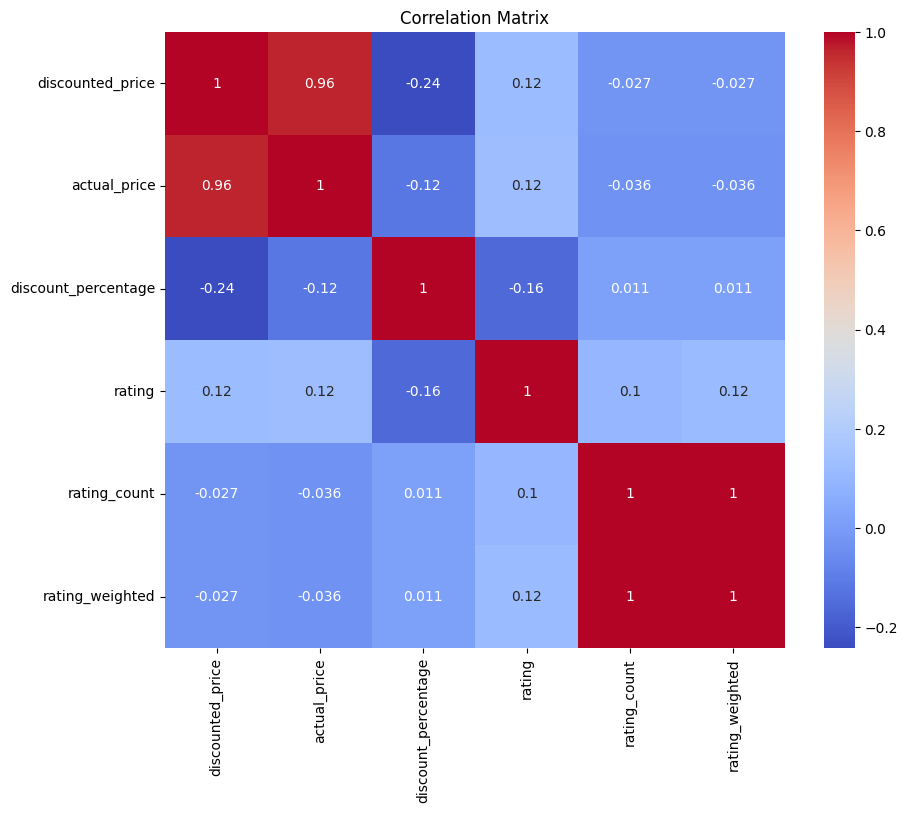

In [16]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
le = LabelEncoder()
df['user_id_encoded'] = le.fit_transform(df['user_id'])
freq_table = pd.DataFrame({'User ID': df['user_id_encoded'].value_counts().index, 'Frequency': df['user_id_encoded'].value_counts().values})

print(freq_table)
id_example = freq_table.iloc[0,0]
print(id_example)

      User ID  Frequency
0        1045         10
1         622          8
2         673          8
3          87          7
4         253          7
...       ...        ...
1186     1020          1
1187      896          1
1188      870          1
1189      203          1
1190      516          1

[1191 rows x 2 columns]
1045


In [18]:
def recommend_products(df, user_id_encoded):
    tfidf = TfidfVectorizer(stop_words='english')
    df['about_product'] = df['about_product'].fillna('')  # fill NaN values with empty string
    tfidf_matrix = tfidf.fit_transform(df['about_product'])
    user_history = df[df['user_id_encoded'] == user_id_encoded]
    indices = user_history.index.tolist()

    if indices:
        cosine_sim_user = cosine_similarity(tfidf_matrix[indices], tfidf_matrix)
        products = df.iloc[indices]['product_name']
        indices = pd.Series(products.index, index=products)
        similarity_scores = list(enumerate(cosine_sim_user[-1]))
        similarity_scores = [(i, score) for (i, score) in similarity_scores if i not in indices]

        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        top_products = [i[0] for i in similarity_scores[1:6]]
        recommended_products = df.iloc[top_products]['product_name'].tolist()
        score = [similarity_scores[i][1] for i in range(5)]

        results_df = pd.DataFrame({'Id Encoded': [user_id_encoded] * 5,'recommended product': recommended_products,
                                   'score recommendation': score})

        return results_df
    else:
        print("No purchase history found.")
        return None

In [19]:
recommend_products(df, 893)

,Id Encoded,recommended product,score recommendation
0,893,"FYA Handheld Vacuum Cleaner Cordless, Wireless...",1.000000
1,893,Eureka Forbes Active Clean 700 Watts Powerful ...,0.347227
2,893,AMERICAN MICRONIC- Imported Wet & Dry Vacuum C...,0.317435
3,893,"INALSA Upright Vacuum Cleaner, 2-in-1,Handheld...",0.310397
4,893,INALSA Vaccum Cleaner Handheld 800W High Power...,0.298666


# ***Sentiment Analysis***

In [37]:
df.head()

,product_id,product_name,category,discount_percentage,rating,rating_count,about_product,review_title,review_content,rating_weighted,sub_category,main_category,user_id_encoded,sentiment,new_review_title
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,101929.8,USBCables,Computers&Accessories,622,Positive,"[satisfiedcharging, really, fastvalue, moneypr..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,175976.0,USBCables,Computers&Accessories,87,Positive,"[good, braided, cable, type, devicegood, quali..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",30919.2,USBCables,Computers&Accessories,846,Positive,"[good, speed, earlier, versionsgood, productwo..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",396324.6,USBCables,Computers&Accessories,253,Positive,"[good, productgood, onenicereally, nice, produ..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",71001.0,USBCables,Computers&Accessories,17,Positive,"[good, originaldecentgood, one, secondary, use..."


In [20]:
df = df.drop(columns = ["discounted_price" , "actual_price" , "img_link" , "product_link" , "user_id" , "user_name" , "review_id"])

In [21]:
a = df["category"].str.split("|")
b = []
for i in a:
   b.append(i[0])

category_1 = pd.DataFrame(b).value_counts().sort_values(ascending = False).reset_index().rename(columns = {0:"category_name" , "count":"count_of_category"})
category_1

,category_name,count_of_category
0,Electronics,526
1,Computers&Accessories,451
2,Home&Kitchen,447
3,OfficeProducts,31
4,MusicalInstruments,2
5,HomeImprovement,2
6,Car&Motorbike,1
7,Health&PersonalCare,1
8,Toys&Games,1


In [22]:
df_rating = df["rating"].value_counts().reset_index().rename(columns = {"count":"count_of_rating"})
df_rating

,rating,count_of_rating
0,4.1,244
1,4.3,230
2,4.2,228
3,4.0,181
4,3.9,123
5,4.4,123
6,3.8,86
7,4.5,75
8,3.7,42
9,3.6,35


In [23]:
def label_sentiment(rating):
    if rating <= 3.8:
        return "Negative"
    elif rating > 3.8:
        return "Positive"
    else:
        return "Unknown"
df["sentiment"] = df["rating"].apply(label_sentiment)
df.sample(5)

,product_id,product_name,category,discount_percentage,rating,rating_count,about_product,review_title,review_content,rating_weighted,sub_category,main_category,user_id_encoded,sentiment
1271,B08H6B3G96,Philips EasySpeed Plus Steam Iron GC2147/30-24...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",0.16,4.3,1954.0,Triple Precision Tip and 360 degree swivel cor...,"Go for it,Good steam iron,Plage big size,Good ...",Writing this review after a month of use.Works...,8402.2,SteamIrons,Home&Kitchen,186,Positive
1126,B00PVT30YI,Kitchen Mart Stainless Steel South Indian Filt...,"Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...",0.41,4.1,4238.0,Material: Food Grade stainless steel; Make aut...,"Coffee Filter,Just go for it!,Happy with the p...",Coffee Filter is just the right size for a sma...,17375.8,DripCoffeeMachines,Home&Kitchen,560,Positive
1021,B07W7Z6DVL,"Infinity (JBL Fuze 100, Wireless Portable Blue...",Electronics|HomeAudio|Speakers|OutdoorSpeakers,0.50,4.1,25262.0,Compact Portable Bluetooth Speakers. Wireless ...,"Good Handy Bluetooth Speaker,Very Nice,Medium,...","Good Bass and Treble. Good Sound Quality.,Good...",103574.2,OutdoorSpeakers,Electronics,976,Positive
774,B09Y14JLP3,STRIFF UPH2W Multi Angle Tablet/Mobile Stand. ...,Electronics|Mobiles&Accessories|MobileAccessor...,0.80,4.1,2451.0,"[PORTABLE SIZE]- 98mm*96mm*19mm, STRIFF desk p...","Totally worth rs99,Best,Good,Valuable,Fulfil p...",Perfect for a 10 inch tablet both vertically a...,10049.1,Stands,Electronics,366,Positive
1130,B0756K5DYZ,Prestige Iris 750 Watt Mixer Grinder with 3 St...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,0.48,3.9,43070.0,Motor Warranty: 2; Product Warranty: 2;|Operat...,"Juicer is not effective,Ok good,Products quali...","Juicer is not effective,Ok good,https://m.medi...",167973.0,MixerGrinders,Home&Kitchen,194,Positive


In [24]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

,count
sentiment,
Positive,1232
Negative,230


In [25]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("" , "" , string.punctuation))
    words = word_tokenize(text)
    stop_words = str(stopwords.words("english"))
    cleaned_words = [word  for word in words if word not in stop_words]
    return cleaned_words

df["new_review_title"] = df["review_title"].apply(clean_text)
df[["review_title" , "new_review_title"]].sample(10)

,review_title,new_review_title
1297,"Best in its price range,Best suction power,Dom...","[best, price, rangebest, suction, powerdomesti..."
1219,"Nice,Heavy weight and good product.,Value for ...","[niceheavy, weight, good, productvalue, moneyl..."
1378,"ok product,It's a good product.,Simply awsome,...","[ok, productits, good, productsimply, awsomeni..."
951,"Nice looking and good finish deskmat,Premium p...","[nice, looking, good, finish, deskmatpremium, ..."
212,"Nice,good,Paisa vassol,Sturdy and long.,Good f...","[nicegoodpaisa, vassolsturdy, longgood, price,..."
803,"Okay product in picture,Good for students,Nice...","[okay, product, picturegood, studentsnice, pro..."
1359,"Broken product,working related issue,Satisfact...","[broken, productworking, related, issuesatisfa..."
1331,Ok product 900/ma bast product A little famil...,"[ok, product, 900ma, bast, product, little, fa..."
699,"Good product,using this product 8months It is ...","[good, productusing, product, 8months, done, f..."
148,"Value for Money,A good upgrade from stock cabl...","[value, moneya, good, upgrade, stock, cablegoo..."


In [26]:
def clean_test(text):
    text = re.sub(r"<.*?>" , text)
    text = re.sub(r"[^\w\s]" , "" , text)
    text = re.sub(r"\d+"  , "", text)
    text = text.lower()
    stop_words = set(stopwords.words("english"))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

a = df['review_title'].apply(clean_text)
a

,review_title
0,"[satisfiedcharging, really, fastvalue, moneypr..."
1,"[good, braided, cable, type, devicegood, quali..."
2,"[good, speed, earlier, versionsgood, productwo..."
3,"[good, productgood, onenicereally, nice, produ..."
4,"[good, originaldecentgood, one, secondary, use..."
...,...
1460,"[received, product, without, spannerexcellent,..."
1461,"[okeverything, good, couldnt, return, bcoz, ne..."
1462,"[goodwork, front, melt, 2, monthgood, oneit, d..."
1463,"[fan, speed, slowgood, qualitygood, productgoo..."


In [27]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['review_title'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("Shape of TF-IDF matrix:", X.shape)
print("First few features:\n", tfidf_df.head())

Shape of TF-IDF matrix: (1462, 3752)
First few features:
     04   05   0k   10  100  1000  101  1080  1080p   11  ...   డక   పర   లగ  \
0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  ...  0.0  0.0  0.0   

    లల   ಉತ   ಕಳ   ತಮ   ಲಸ   ವಸ   ಸರ  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 3752 columns]


In [28]:
x = vectorizer.fit_transform(df["review_title"])
y = df["sentiment"].values
x_dense = x.toarray()
x_train , x_test , y_train , y_test = train_test_split(x_dense , y  , test_size = 0.2)

In [31]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

In [32]:
precision = precision_score(y_test , y_pred , average = "weighted")
recall = recall_score(y_test , y_pred , average = "weighted")
f1 = f1_score(y_test , y_pred , average = "weighted")
report = classification_report(y_test , y_pred)

print(f"Accuracy: {accuracy_score(y_test , y_pred)}")
print(f"Precision score : {precision}")
print(f"Precision score : {recall}")
print(f"F1 score:{f1}")
print("classification report \n" , report)

Accuracy: 0.8430034129692833
Precision score : 0.8677357520220675
Precision score : 0.8430034129692833
F1 score:0.7744876316869035
classification report 
               precision    recall  f1-score   support

    Negative       1.00      0.02      0.04        47
    Positive       0.84      1.00      0.91       246

    accuracy                           0.84       293
   macro avg       0.92      0.51      0.48       293
weighted avg       0.87      0.84      0.77       293



In [36]:
test_review = [
    "This product is excellent, I love it!",
    "The experience was average, not great but not bad.",
    "Not Good Not bad",
    "This product is excellent, I love it!",
    "Nice product quality excellent packaging",
    "very nice product good quality"
]
new_x = vectorizer.transform(test_review)
prediction_test_data = model.predict(new_x)
prediction_probabilities = model.predict_proba(new_x)

class_labels = model.classes_
for review , sentiment , probabilities in zip(test_review , prediction_test_data ,prediction_probabilities):
    print("--"*20)
    print(f"Review {review}")
    print(f"Predicted sentiment: {sentiment}")
    for label , prob in zip(class_labels , probabilities):
        print(f"probability of {label}: {prob}")

----------------------------------------
Review This product is excellent, I love it!
Predicted sentiment: Positive
probability of Negative: 0.15753217042371992
probability of Positive: 0.8424678295762801
----------------------------------------
Review The experience was average, not great but not bad.
Predicted sentiment: Negative
probability of Negative: 0.5373157387144292
probability of Positive: 0.4626842612855709
----------------------------------------
Review Not Good Not bad
Predicted sentiment: Negative
probability of Negative: 0.7858627491143038
probability of Positive: 0.2141372508856962
----------------------------------------
Review This product is excellent, I love it!
Predicted sentiment: Positive
probability of Negative: 0.15753217042371992
probability of Positive: 0.8424678295762801
----------------------------------------
Review Nice product quality excellent packaging
Predicted sentiment: Positive
probability of Negative: 0.0882587063886352
probability of Positive: 0.